## Import statements

In [43]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from tools.outputfiles_merge import *
from tools.plot_Bscan import *
from tools.plot_Ascan import *

## Simulation data analysis

### Model merge

In [5]:
# Filepath without file extention to merge
basefilename = "files/output_files/2D_boxes_clean/2D_boxes_clean_box_07ghz_wat"

# Merge all A-scans into one file
merge_files_api(basefilename,removefiles=False)

### Manipulating data

In [2]:
## Standard procedure to open an manipulate data
## Used in other modules

# Filepath of merged file
filename = "files/output_files/2D_cylinders_clean/2D_cylinders_clean28.out"

# Open output file and read some attributes
f = h5py.File(filename, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]
f.close()

# Manipulating data
outputdata = np.array(outputdata)
outputdata[0:1000] = np.zeros(1000)
data = outputdata

### Plotting and analysing A-scans

#### Functions

In [1]:
def plot_ascan_custom(filename, data,time, savefig=False):
    """ Plots data over time and saves figure if needed
    
    Input:
        filename: path to file
        data:   array of power
        time:   array of arrival time (same size as data)
    Output:
        (plot)
    """
    # Get filename
    (path, filename) = os.path.split(filename)

    # PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [s]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(20, 10), facecolor='w', edgecolor='w')
    line = ax.plot(time,data, 'r', lw=2, label="Ez")
    ax.set_xlim([np.amin(time), np.amax(time)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename)[0]
        fig.savefig(path + os.sep + savefile + '_ascan.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)

def plot_ascan_thesis(filename, data,time, savefig=False):
    """ Plots data over time in thesis format and saves figure if needed
    
    Input:
        filename: path to file
        data:   array of power
        time:   array of arrival time (same size as data)
    Output:
        (plot)
    """
    # Get filename
    (path, filename) = os.path.split(filename)

    # PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [s]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(7, 3.5), facecolor='w', edgecolor='w')
    line = ax.plot(time,data, 'r', lw=2, label="Ez")
    ax.set_xlim([np.amin(time), np.amax(time)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename)[0]
        fig.savefig(path + os.sep + savefile + '_ascan.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)

def plot_ascan_depth(filename, data,time, savefig=False):
    """ Converts time into depth by velocity analysis, set er manually
        Plots data over depth and saves figure if needed
    
    Input:
        filename: path to file
        data:   array of power
        time:   array of arrival time (same size as data)
    Output:
        (plot)
    """
    # Get filename from file path
    (path, filename) = os.path.split(filename)

# PARAMETERS
    # Dielectric constant
    er = 5
    # Zeroing at time
    zeroing = 0.36
    # Convertion time to depth with velocity analysis
    depth = time * (2.998e8 / np.sqrt(er)) /2 - zeroing
    
# PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Depth [m]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(20, 10), facecolor='w', edgecolor='w')
    line = ax.plot(depth,data, 'r', lw=2, label="Ez")
    ax.set_xlim([np.amin(depth), np.amax(depth)])
    major_ticks_top_x=np.linspace(round(depth[0],1),round(depth[-1],1),int((round(depth[-1]-depth[0],1))/0.05)+1)
    ax.set_xticks(major_ticks_top_x)
    ax.grid(which='both', axis='both', linestyle='-.')
    fig.text(.99,.99,f"Dielectric constant used: {er}",fontsize=12, ha='right', va='top', transform=ax.transAxes)
    
    # Save figure
    if savefig:
        savefile = os.path.splitext(filename)[0]
        fig.savefig(path + os.sep + savefile + '_avg_depth.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)


def plot_ascan_multiple(filename1, filename2, data1, data2, time1, time2, savefig=False):
    """ Plots two Ascans (data over time) and saves figure if needed
    
    Input:
        filenamei: path to file i
        datai:   array of power
        timei:   array of arrival time (same size as datai)
    Output:
        (plot)
    """
    # Get filenames
    (path, filename1) = os.path.split(filename1)
    (path, filename2) = os.path.split(filename2)

# PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [s]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(20, 10), facecolor='w', edgecolor='w')
    line = ax.plot(time1,data1, 'r', lw=2, label=f"{filename1}")
    line = ax.plot(time2,data2, 'b', lw=2, label=f"{filename2}")
    ax.set_xlim([np.amin(time1), np.amax(time1)])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.legend()

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename)[0]
        fig.savefig(path + os.sep + savefile + '_ascan.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)

def plot_ascan_thesis_multiple(filename1, filename2, data1, data2, time1, time2, savefig=False):
    """ Plots two Ascans (data over time) in thesis format and saves figure if needed
    
    Input:
        filenamei: path to file i
        datai:   array of power
        timei:   array of arrival time (same size as datai)
    Output:
        (plot)
    """
    # Get filenames
    (path, filename1) = os.path.split(filename1)
    (path, filename2) = os.path.split(filename2)

# PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [s]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(7, 3.5), facecolor='w', edgecolor='w')
    line = ax.plot(time1,data1, 'r', lw=2, label="Ricker pulse")  # Adjust label name
    line = ax.plot(time2,data2, 'b', lw=2, label=f"Adjusted waveform")  # Adjust label name
    ax.set_xlim([np.amin(time1), 15e-9])
    # ax.set_ylim([-15, 20])
    ax.grid(which='both', axis='both', linestyle='-.')
    ax.legend()

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename)[0]
        fig.savefig(path + os.sep + savefile + '_ascan.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)

#### Data manipulation and plotting

In [ ]:
# Filepath 
filename1 = "files/output_files/2D_boxes_clean/2D_boxes_clean_woSL.out"

# Open output file and read some attributes
f = h5py.File(filename1, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time1 = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]
f.close()

# Manipulating data
outputdata = np.array(outputdata)
data1 = outputdata[:,18:30]
# Filter direct signal
data1[range(1000),:] = np.zeros([1000,data1.shape[1]]) #1000 for 2D models (2mm spatial res), 400 for 3D models (5mm spatial res)
data_mean1 = data1.mean(axis=1)

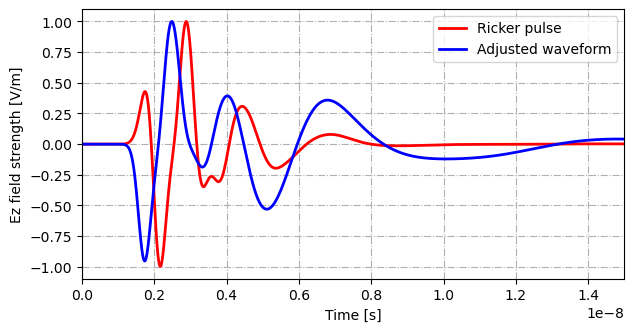

In [123]:
## File 1
# filename = f"{basefilename}_merged.out"
filename1 = "files/output_files/2D_antenna_ricker.out"

# Open output file and read some attributes
f = h5py.File(filename1, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time1 = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata1 = f[path + "Ey"][:] # Change to Ez if 2D, Ey is used for 3D 
data1 = outputdata1/np.amax(outputdata1)
f.close()

## File 2
filename2 = "files/output_files/2D_antenna.out"

# Open output file and read some attributes
f = h5py.File(filename2, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time2 = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata2 = f[path + "Ey"][:] # Change to Ez if 2D, Ey is used for 3D 
data2 = outputdata2/np.amax(outputdata2)
f.close()


# PLOT
plot_ascan_thesis_multiple(filename1,filename2,data1,data2,time1,time2)
# plot_ascan_thesis(filename1,outputdata,time1)

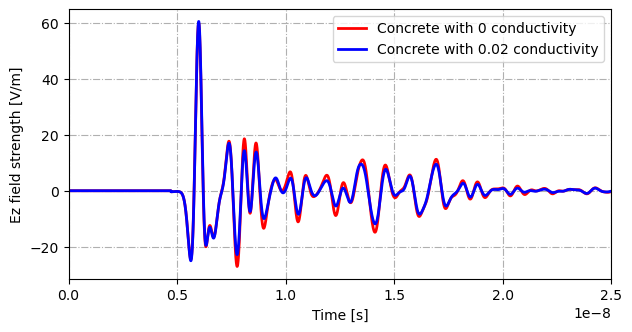

In [94]:
## File 1
filename1 = "files/output_files/2D_boxes_clean/2D_boxes_clean_0cond_box40.out"

# Open output file and read some attributes
f = h5py.File(filename1, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time1 = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]
data1 = outputdata
data1[range(1000)] = np.zeros([1000]) #1000 for 2D models (2mm spatial res), 400 for 3D models (5mm spatial res)
f.close()

## File 2
filename2 = "files/output_files/2D_boxes_clean/2D_boxes_clean_box40.out"

# Open output file and read some attributes
f = h5py.File(filename2, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time2 = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]
data2 = outputdata
data2[range(1000)] = np.zeros([1000]) #1000 for 2D models (2mm spatial res), 400 for 3D models (5mm spatial res)
f.close()

plot_ascan_thesis_multiple(filename1,filename2,data1,data2,time1,time2)

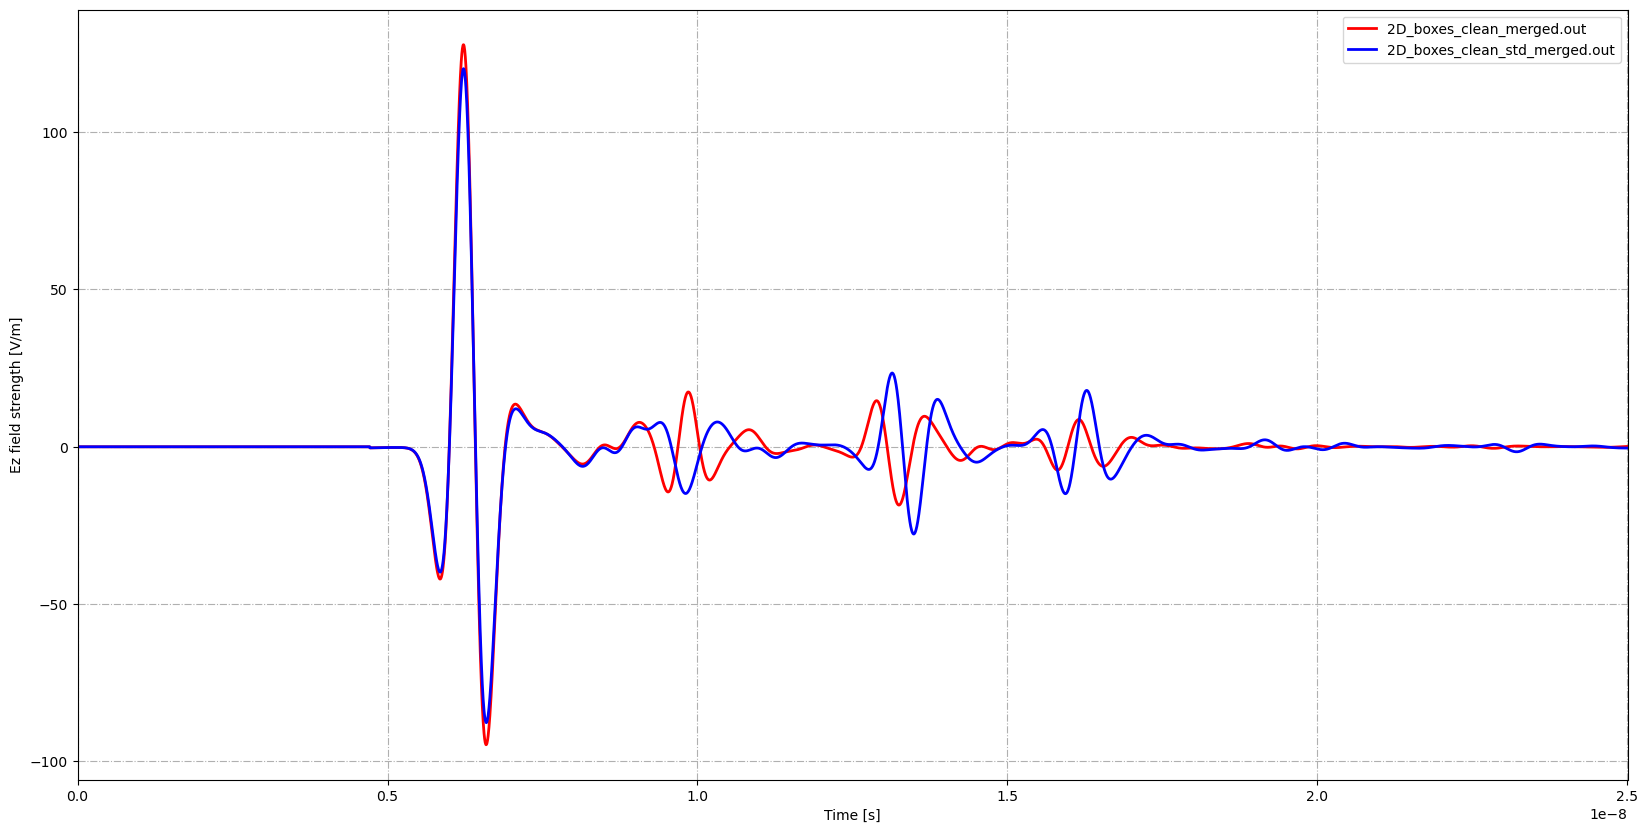

In [35]:
## File 1
# filename = f"{basefilename}_merged.out"
filename1 = "files/output_files/2D_boxes_clean/2D_boxes_clean_merged.out"

# Open output file and read some attributes
f = h5py.File(filename1, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time1 = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]
f.close()

# Manipulating data
outputdata = np.array(outputdata)
data1 = outputdata[:,18:30]
data1[range(1000),:] = np.zeros([1000,data1.shape[1]]) #1000 for 2D models (2mm spatial res), 400 for 3D models (5mm spatial res)
data_mean1 = data1.mean(axis=1)


# File 2
filename2 = "files/output_files/2D_boxes_clean_std/2D_boxes_clean_std_merged.out"

# Open output file and read some attributes
f = h5py.File(filename2, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time2 = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]
f.close()

# Manipulating data
outputdata = np.array(outputdata)
data2 = outputdata[:,18:30]
data2[range(1000),:] = np.zeros([1000,data2.shape[1]]) #1000 for 2D models (2mm spatial res), 400 for 3D models (5mm spatial res)
data_mean2 = data2.mean(axis=1)


plot_ascan_multiple(filename1,filename2, data_mean1,data_mean2, time1, time2)
# plot_ascan_depth(filename, data_mean,time,savefig=True)

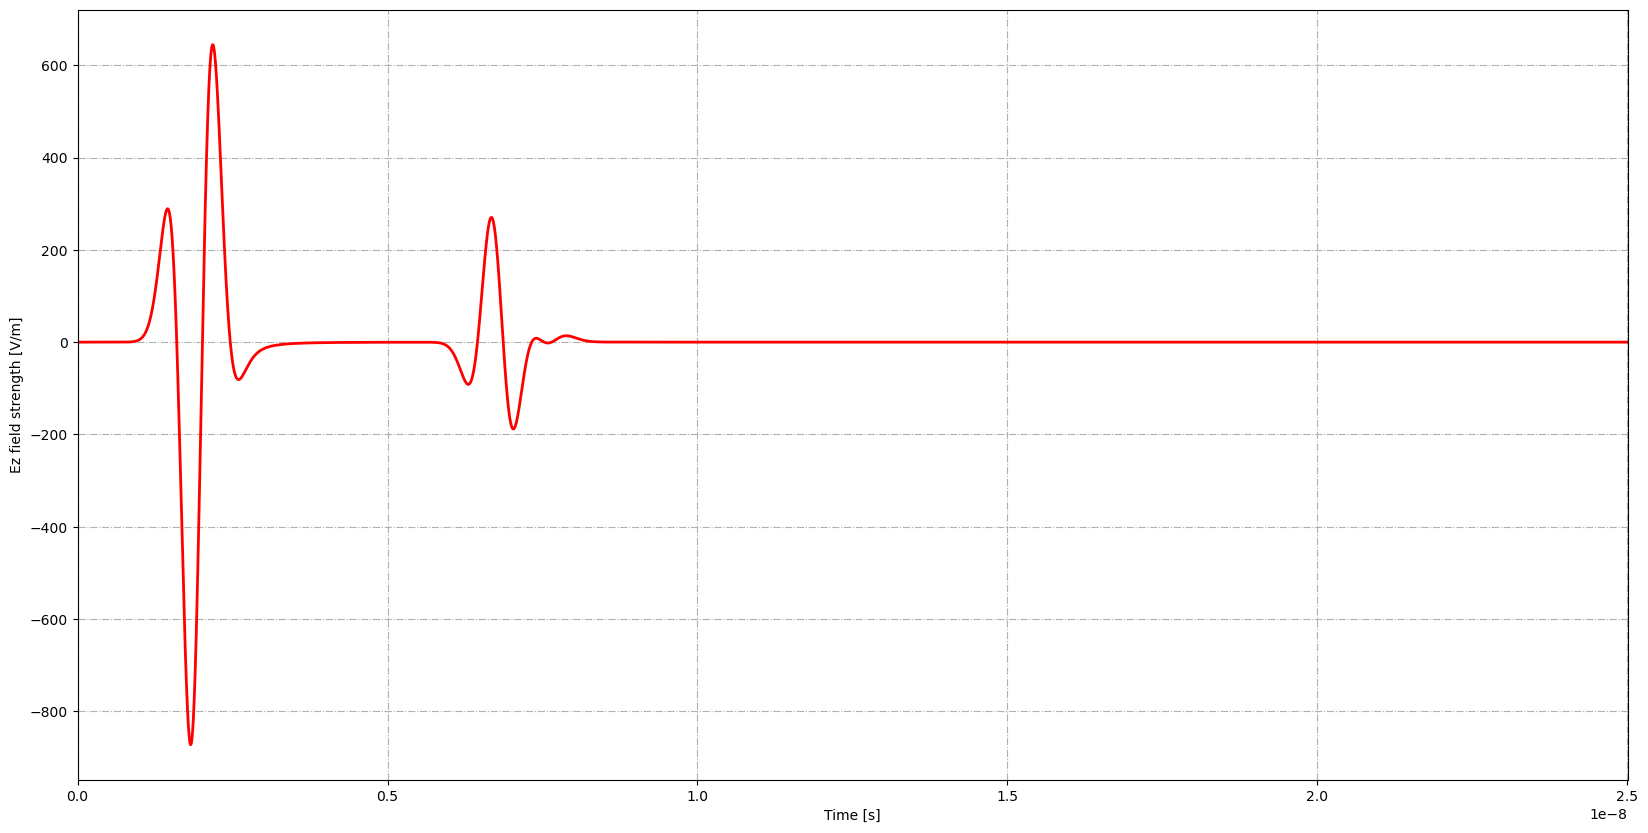

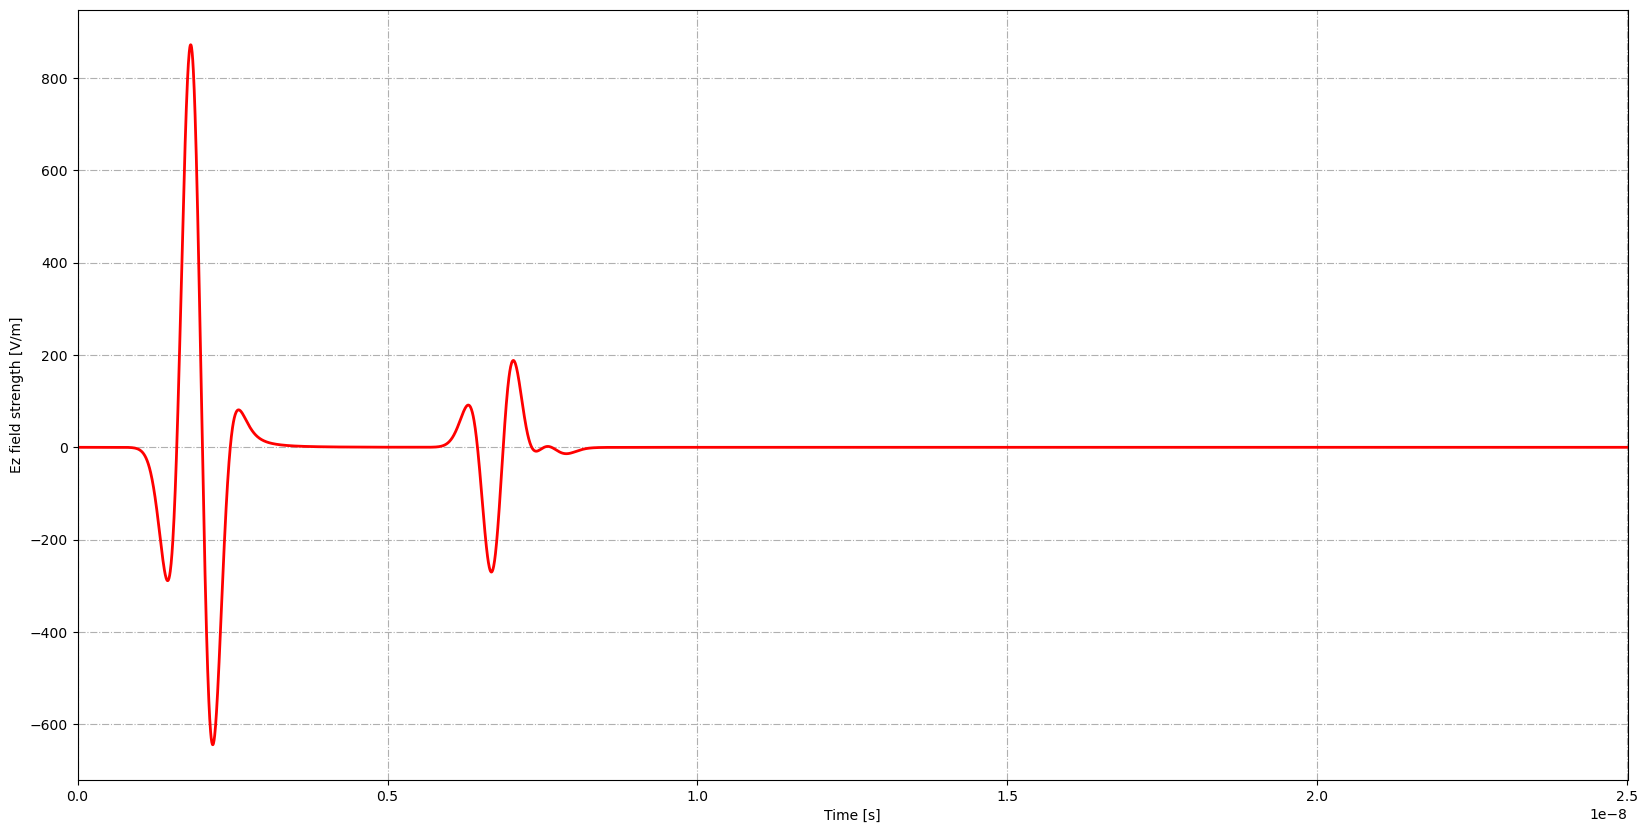

In [4]:
# Plot single Ascan
outputfile = "files/output_files/2D_HighMetal/2D_HighMetal.out"
plot_ascan_api(outputfile,"Ez",plot_fft=False)

# Plot single Ascan
outputfile1 = "files/output_files/2D_HighMetal_gaussiandotdot.out"
plot_ascan_api(outputfile1,"Ez",plot_fft=False)

### Plotting and analysing B-scans

#### Functions

In [7]:
def plot_bscan_custom(filename, data, time, savefig=False):
    """ Plot b-scan from filepath with power amplitude
    
    Input:
        filename: path to merged file
        data:   power amplitudes (nxj array)
        time:   arrival times at recording (y-axis) - j array
    Output:
        (B-Scan plot)
    """

    # Convert seconds into nanoseconds
    time = time *1e9

    # Get filename from filepath
    (path, filename) = os.path.split(filename)

    # PLOT
    fig = plt.figure(num=filename + ' - rx1', 
                     figsize=(20, 10), facecolor='w', edgecolor='w')
    plt.imshow(data, 
               extent=[0, data.shape[1], np.amax(time), 0], 
               interpolation='nearest', aspect='auto', cmap='seismic', 
               vmin=-np.amax(np.abs(data)), vmax=np.amax(np.abs(data)))
    plt.xlabel('Trace number')
    plt.ylabel('Time [ns]')
    plt.title('{}'.format(filename))

    # Grid properties
    ax = fig.gca()
    ax.grid(which='both', axis='both', linestyle='-.')

    cb = plt.colorbar()
    cb.set_label('Field strength [V/m]')
    plt.show()

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename)[0]
        fig.savefig(path + os.sep + savefile + '.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)

def plot_bscan_thesis(filename, data, time, savefig=False):
    """ Plot b-scan from filepath with power amplitude in thesis format
    
    Input:
        filename: path to merged file
        data:   power amplitudes (nxj array)
        time:   arrival times at recording (y-axis) - j array
    Output:
        (B-Scan plot)
    """

    # Convert seconds into nanoseconds
    time = time *1e9

    # Get filename from filepath
    (path, filename) = os.path.split(filename)

    # PLOT
    fig = plt.figure(num=filename + ' - rx1', 
                     figsize=(7, 3.5), facecolor='w', edgecolor='w')
    plt.imshow(data, 
               extent=[0, data.shape[1], np.amax(time), 0], 
               interpolation='nearest', aspect='auto', cmap='seismic', 
               vmin=-np.amax(np.abs(data)), vmax=np.amax(np.abs(data))) # hanning, Standard interpolation: nearest
    plt.xlabel('Trace number')
    plt.ylabel('Time [ns]')
    # plt.title('{}'.format(filename))

    # Grid properties
    ax = fig.gca()
    ax.grid(which='both', axis='both', linestyle='-.')

    cb = plt.colorbar()
    cb.set_label('Field strength [V/m]')
    plt.show()

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename)[0]
        fig.savefig(path + os.sep + savefile + '.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)

def plot_bscan_depth(filename, data, time, savefig=False):
    """ Converts time to depth by velocity analysis
        Plot b-scan from filepath with power amplitude over depth
    
    Input:
        filename: path to merged file
        data:   power amplitudes (nxj array)
        time:   arrival times at recording (y-axis) - j array
    Output:
        (B-Scan plot)
    """
# PARAMETERS
    # Dielectric constant
    er = 2
    # Zeroing at
    zeroing = 0.6
    # Converting time to depth
    max_depth = np.amax(time) * (2.998e8 / np.sqrt(er)) /2

    # Step properties
    rx_src_mid_start = 0.26
    step = 0.02

    # Get filename from filepath
    (path, filename) = os.path.split(filename)

# PLOT
    fig = plt.figure(num=filename + ' - rx1', 
                     figsize=(20, 10), facecolor='w', edgecolor='w')
    plt.imshow(data, 
               extent=[rx_src_mid_start, rx_src_mid_start + data.shape[1]*step, max_depth-zeroing, -zeroing], 
               interpolation='nearest', aspect='auto', cmap='seismic', 
               vmin=-np.amax(np.abs(data)), vmax=np.amax(np.abs(data)))
    plt.xlabel('Location [m]')
    plt.ylabel('Depth [m]')
    plt.title('{}'.format(filename))

    # Grid properties
    major_ticks_top_x=np.linspace(rx_src_mid_start,rx_src_mid_start + data.shape[1]*step,int(data.shape[1]*step/0.05)+1)
    major_ticks_top_y=np.linspace(round(max_depth-zeroing,1),-zeroing,int(round(max_depth,1)/0.1)+1)
    ax = fig.gca()
    ax.set_xticks(major_ticks_top_x)
    ax.set_yticks(major_ticks_top_y)
    ax.grid(which='both', axis='both', linestyle='-.')

    cb = plt.colorbar()
    cb.set_label('Field strength [V/m]')
    fig.text(.99,.99,f"Dielectric constant used: {er}",fontsize=12, ha='right', va='top', transform=ax.transAxes)
    plt.show()

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename)[0]
        fig.savefig(path + os.sep + savefile + '_depth.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)


#### Data manipulation and plotting

In [24]:
filename = f"{basefilename}_merged.out"

# Open output file and read some attributes
f = h5py.File(filename, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]

outputdata = np.array(outputdata)
print(outputdata.shape)
outputdata[range(1000),:] = np.zeros([1000,outputdata.shape[1]]) #1000 for 2D models (2mm spatial res), 400 for 3D models (5mm spatial res)
data = outputdata
print(data.shape)
f.close()

(5301, 55)
(5301, 55)


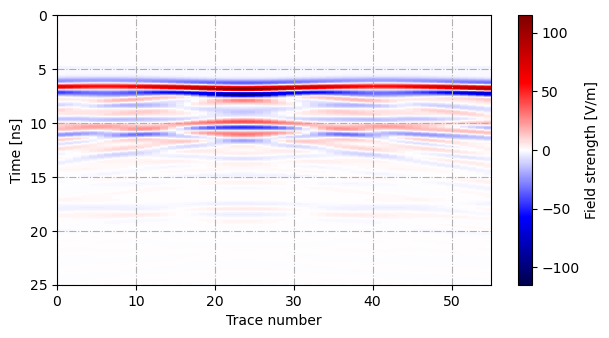

In [8]:
filename = "files/output_files/2D_boxes_clean/2D_boxes_clean_box_07ghz_wat_merged.out"

# Open output file and read some attributes
f = h5py.File(filename, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]

outputdata = np.array(outputdata)
outputdata[range(1000),:] = np.zeros([1000,outputdata.shape[1]]) #1000 for 2D models (2mm spatial res), 400 for 3D models (5mm spatial res)
data = outputdata
f.close()

plot_bscan_thesis(filename,data,time)

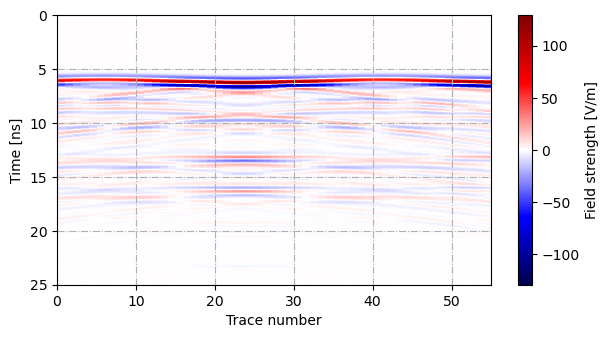

In [84]:
filename = "files/output_files/2D_boxes_clean/2D_boxes_clean_box_merged.out"

# Open output file and read some attributes
f = h5py.File(filename, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ez"][:]

outputdata = np.array(outputdata)
outputdata[range(1000),:] = np.zeros([1000,outputdata.shape[1]]) #1000 for 2D models (2mm spatial res), 400 for 3D models (5mm spatial res)
data = outputdata
f.close()

plot_bscan_thesis(filename,data,time)

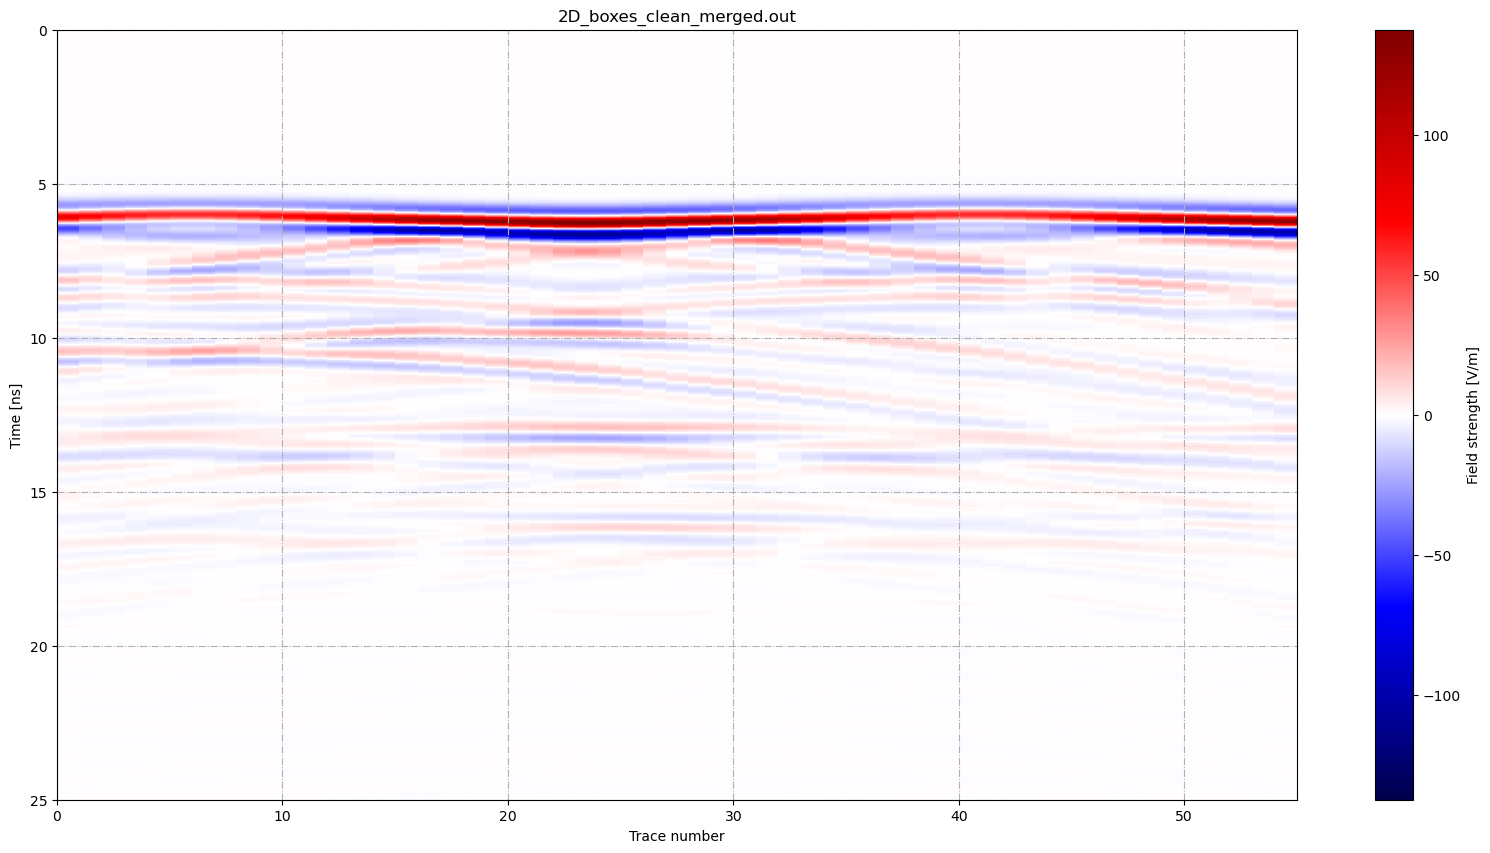

In [25]:
# Plot B-scan
filename = f"{basefilename}_merged.out"
plot_bscan_custom(filename,data,time,savefig=True)

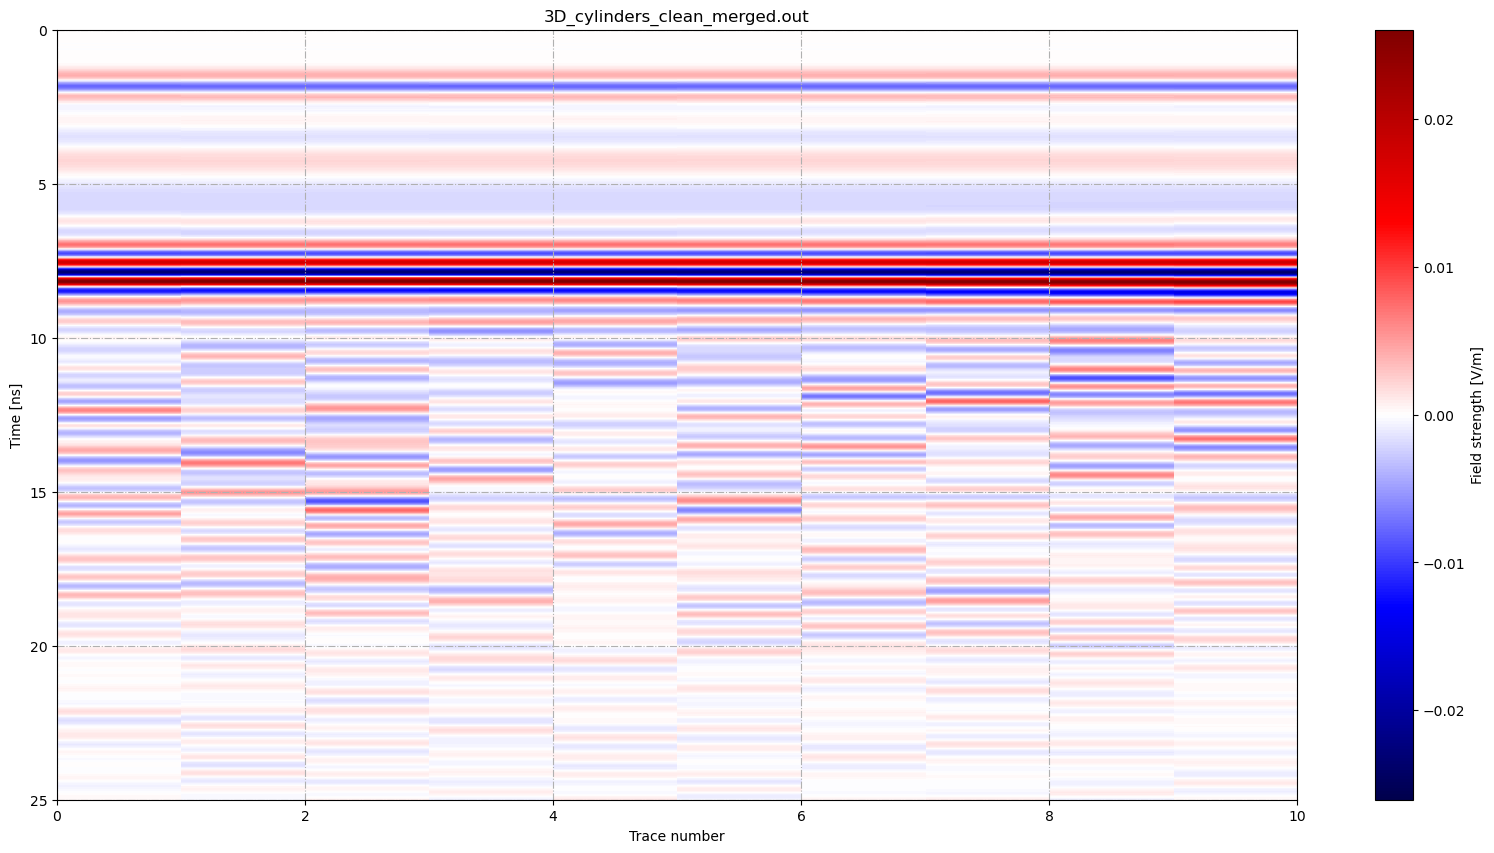

In [10]:
filename = f"{basefilename}_merged.out"

# Open output file and read some attributes
f = h5py.File(filename, 'r')
nrx = f.attrs['nrx']
dt = f.attrs['dt']
iterations = f.attrs['Iterations']
time = np.linspace(0, (iterations - 1) * dt, num=iterations)

# Read out data
path = f'/rxs/rx{str(nrx)}/'
outputdata = f[path + "Ey"][:]

outputdata = np.array(outputdata)
# print(outputdata.shape)
# outputdata[range(1000),:] = np.zeros([1000,outputdata.shape[1]])
data = outputdata
# print(data.shape)
f.close()

plot_bscan_custom(filename,data,time,savefig=False)

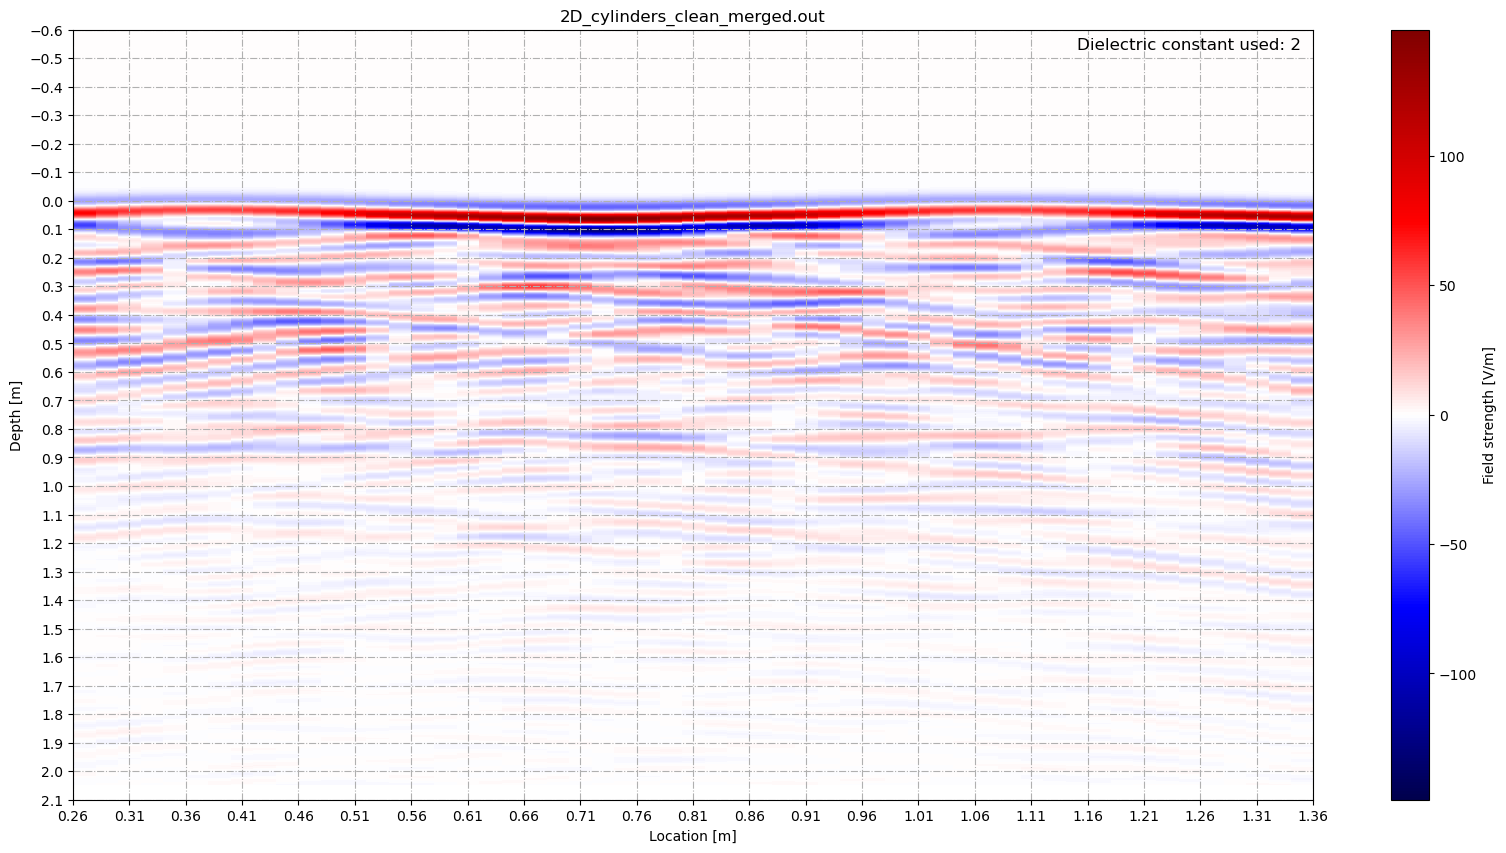

In [145]:
# Plot B-scan over depth
filename = f"{basefilename}_merged.out"
plot_bscan_depth(filename,data,time,savefig=True)

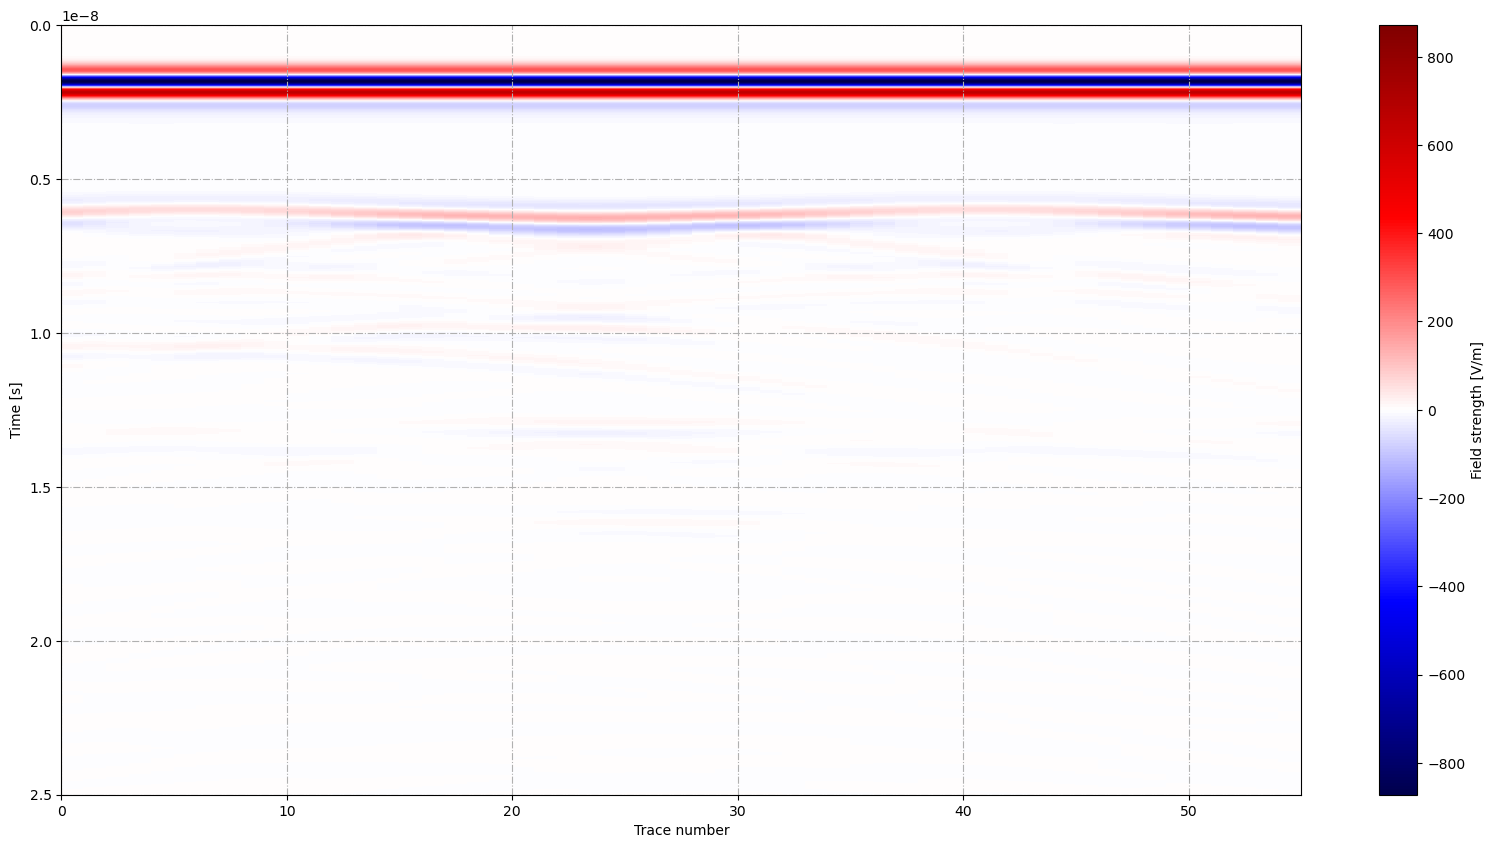

In [129]:
# Plot B-scan with gprMax API
outputfile = f"{basefilename}_merged.out"
plot_bscan_api(outputfile,"Ez")

## Waveform analysis

### Functions

In [30]:
def read_data(filename):
    """ Get data from .out file
    
    Input:
        filename:   path to .out file
    Output:
        outputdata: matrix with A-scan field strength data
        time:       time associated with field strength data
    """
    
    # Open output file and read some attributes
    f = h5py.File(filename, 'r')
    nrx = f.attrs['nrx']
    dt = f.attrs['dt']
    iterations = f.attrs['Iterations']
    time = np.linspace(0, (iterations - 1) * dt, num=iterations)

    # Read out data
    path = f'/rxs/rx{str(nrx)}/'
    outputdata = f[path + "Ez"][:]
    f.close()

    return outputdata, time, dt


In [25]:
def plot_ascan_thesis(filename, data,time, savefig=False):
    """ Plots data over time in thesis format and saves figure if needed
    
    Input:
        filename: path to file
        data:   array of power
        time:   array of arrival time (same size as data)
    Output:
        (plot)
    """
    # Get filename from filepath
    (path, filename) = os.path.split(filename)
    
    # PLOT
    fig, ax = plt.subplots(subplot_kw=dict(xlabel='Time [s]', ylabel='Ez field strength [V/m]'), num='rx1' , figsize=(7, 3.5), facecolor='w', edgecolor='w')
    line = ax.plot(time,data, 'r', lw=2, label="Ez")
    ax.set_xlim([0, 15e-9])
    ax.set_ylim([-900, 700])
    ax.grid(which='both', axis='both', linestyle='-.')

    # Save figure
    if savefig:
        savefile = os.path.splitext(filename)[0]
        fig.savefig(path + os.sep + savefile + '_ascan.png', dpi=150, format='png', 
            bbox_inches='tight', pad_inches=0.1)

In [41]:
def fft_waveform(waveform,dt):
    """ Calculates a FFT of wave from and plots it

    Input:
        waveform:       time domain waveform
        dt:             time step    
    Output:
        Frequency plot  
    """

# CALCULATION
    # Calculate FFT
    freqs, power = fft_power(waveform, dt)

    fig, ax2 = plt.subplots(figsize=(7, 3.5), facecolor='w', edgecolor='w')
    # Set plotting range to 4 times frequency at max power of waveform or
    # 4 times the centre frequency
    freqmaxpower = np.where(np.isclose(power, 0))[0][0]
    if freqs[freqmaxpower] > 1e9:
        pltrange = np.where(freqs > 4 * freqs[freqmaxpower])[0][0]
    else:
        pltrange = np.where(freqs > 4 * 1e9)[0][0]
    pltrange = np.s_[0:pltrange]

# PLOT
    markerline, stemlines, baseline = ax2.stem(freqs[pltrange], power[pltrange], linefmt='-.', use_line_collection=True)
    plt.setp(baseline, 'linewidth', 0)
    plt.setp(stemlines, 'color', 'r')
    plt.setp(markerline, 'markerfacecolor', 'r', 'markeredgecolor', 'r')
    
    ax2.grid(which='both', axis='both', linestyle='-.')
    ax2.plot(freqs[pltrange], power[pltrange], 'r', lw=2)
    ax2.set_xlabel('Frequency [Hz]')
    ax2.set_ylabel('Power [dB]')

In [33]:
def fft_power(waveform, dt):
    """Calculate a FFT of the given waveform of amplitude values;
        converted to decibels and shifted so that maximum power is 0dB

    Input:
        waveform:   time domain waveform
        dt:         time step

    Output:
        freqs:      frequency bins
        power:      power
    """

    # Calculate magnitude of frequency spectra of waveform (ignore warning from taking a log of any zero values)
    with np.errstate(divide='ignore'):
        power = 10 * np.log10(np.abs(np.fft.fft(waveform))**2)

    # Replace any NaNs or Infs from zero division
    power[np.invert(np.isfinite(power))] = 0

    # Frequency bins
    freqs = np.fft.fftfreq(power.size, d=dt)

    # Shift powers so that frequency with maximum power is at zero decibels
    power -= np.amax(power)

    return freqs, power

### Analysis and plotting

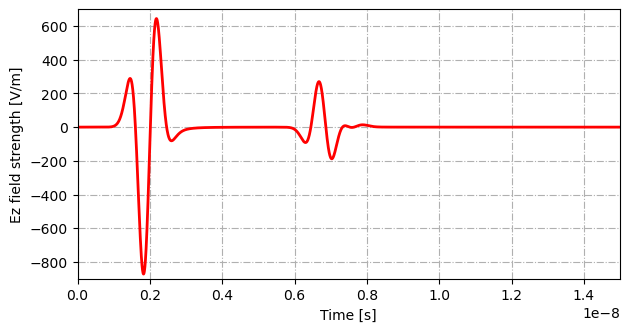

In [31]:
filename = "files/output_files/2D_HighMetal/2D_HighMetal.out"

data, time, dt = read_data(filename)
plot_ascan_thesis(filename,data,time)

data_isolated = data[1250:1600]
time_isolated = time[1250:1600]

# plot_ascan_thesis(filename,data_isolated,time_isolated)

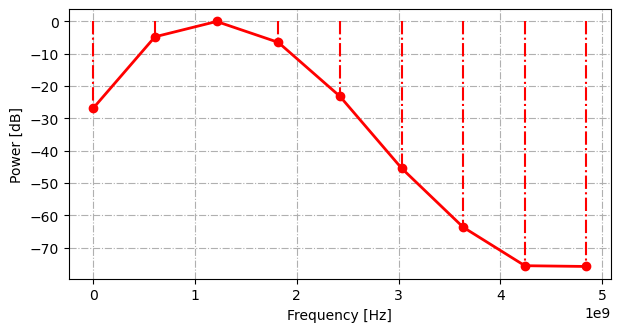

In [42]:
fft_waveform(data_isolated,dt)